# Example with cifar data set 

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


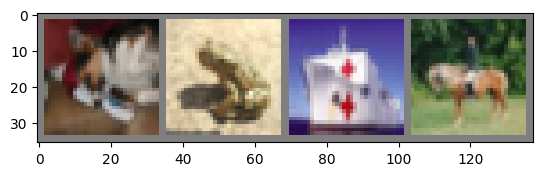

dog   frog  ship  horse


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [3]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [14]:
epochs = 10 

for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.207
[1,  4000] loss: 1.193
[1,  6000] loss: 1.189
[1,  8000] loss: 1.191
[1, 10000] loss: 1.183
[1, 12000] loss: 1.190
[2,  2000] loss: 1.088
[2,  4000] loss: 1.121
[2,  6000] loss: 1.125
[2,  8000] loss: 1.104
[2, 10000] loss: 1.093
[2, 12000] loss: 1.100
[3,  2000] loss: 1.022
[3,  4000] loss: 1.058
[3,  6000] loss: 1.013
[3,  8000] loss: 1.063
[3, 10000] loss: 1.038
[3, 12000] loss: 1.039
[4,  2000] loss: 0.950
[4,  4000] loss: 0.981
[4,  6000] loss: 0.989
[4,  8000] loss: 0.980
[4, 10000] loss: 1.011
[4, 12000] loss: 0.995
[5,  2000] loss: 0.897
[5,  4000] loss: 0.913
[5,  6000] loss: 0.950
[5,  8000] loss: 0.937
[5, 10000] loss: 0.972
[5, 12000] loss: 0.971
[6,  2000] loss: 0.860
[6,  4000] loss: 0.888
[6,  6000] loss: 0.881
[6,  8000] loss: 0.922
[6, 10000] loss: 0.914
[6, 12000] loss: 0.919
[7,  2000] loss: 0.824
[7,  4000] loss: 0.827
[7,  6000] loss: 0.863
[7,  8000] loss: 0.889
[7, 10000] loss: 0.887
[7, 12000] loss: 0.877
[8,  2000] loss: 0.784
[8,  4000] 

In [15]:
PATH = './nn/cifar_net_10epoch.pth'
torch.save(net.state_dict(), PATH)

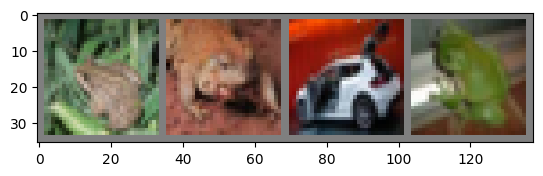

GroundTruth:  frog  frog  car   frog 
Predicted:  frog  frog  cat   frog 


In [16]:
dataiter = iter(testloader)
images, labels = next(dataiter)
images, labels = next(dataiter)


# Predictions of the model
outputs = net(images)  # Adding the channel dimension
_, predicted = torch.max(outputs, 1)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))